## Autoimmune Tweets using Lemmatized Tweets with 8 categories of autoimmune diseases
Those being: 
1:Multiple Sclerosis, 2:Celiac, 3: Leukemia, 4: Hashimoto, 5: Fibromyalgia, 6: Kidney Disease, 7: Rheumatoid Arthritis, 8: Chron's Disease

Tweets were taken from respective diseases in early December 2019 from 13 to 119 
tweets for each disease, as many as were found that weren't mostly marketing, using ''<disease> treatment' in the search

In [41]:
%matplotlib inline 
import pandas as pd 
import matplotlib.pyplot as plt 
from textblob import TextBlob 
import sklearn 
import numpy as np 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix 
 
np.random.seed(507) 
 


In [42]:
reviews = pd.read_csv('TargetReady.csv', encoding = 'unicode_escape') 
#the encoding needed for python3 handling nonASCII chars


In [43]:
reviews.head()


,Tweet,Type
0,UNKNOWNResearchCa\r\n@UNKNOWN_ARC\r\n·\r\n19h\...,Rheumatoid Arthritis
1,UNKNOWNatology Advisor\r\n@UNKNOWNAdvisor\r\n·...,Rheumatoid Arthritis
2,UNKNOWN Community\r\n@our_UNKNOWN\r\n·\r\nDec ...,Rheumatoid Arthritis
3,UNKNOWN National Research Foundation\r\n@CureU...,Rheumatoid Arthritis
4,Orthopedic News\r\n@Orthopedics_Bio\r\n·\r\nDe...,Rheumatoid Arthritis


In [44]:
reviews.tail()

,Tweet,Type
502,"All Ezine\r\n@allezine\r\n·\r\nJun 13, 2011\r\...",Chron's Disease
503,Brian Coombes\r\n@BrianKCoombes\r\n·\r\nSep 6\...,Chron's Disease
504,"Purpose ?\r\n@HappyBelieber\r\n·\r\nJan 19, 20...",Chron's Disease
505,K. Ketels-Lichtig\r\n@kklichtig\r\n·\r\nOct 25...,Chron's Disease
506,"-DC-\r\n @FuckwitdaDC\r\n·\r\nJul 8, 2015\r\...",Chron's Disease


In [45]:
reviews.shape

(507, 2)

In [46]:
reviews = reviews.reindex(np.random.permutation(reviews.index))

print(reviews.head())
print(reviews.tail())

                                                 Tweet                Type
288  Aleksandar dr Petrov\r\n@aleksandar_BG\r\n·\r\...  Multiple Sclerosis
70   Beyond UNKNOWN\r\n@BeyondUNKNOWN\r\n·\r\nSep 1...      Celiac Disease
184  #HandsOffVenezuela\r\n@ChicoFreedom\r\n·\r\nDe...            Leukemia
459  Adult & Pediatric Ear, Nose & Throat\r\n@EarAd...   Hashimoto Disease
448  Angela J. White\r\n@50Plushealths\r\n·\r\nDec ...        Fibromyalgia
                                                 Tweet                Type
136  CURE Magazine\r\n@cure_magazine\r\n·\r\nDec 3\...            Leukemia
503  Brian Coombes\r\n@BrianKCoombes\r\n·\r\nSep 6\...     Chron's Disease
295  Glynis Edwards\r\n@Glynis4B12\r\n·\r\nNov 26\r...  Multiple Sclerosis
452  Mavz\r\n@mattymavz\r\n·\r\nNov 5, 2018\r\nIt's...        Fibromyalgia
112  GrupoCronosSEFH\r\n@GRUPOCRONOSSEF1\r\n·\r\nDe...      Kidney Disease


In [47]:


reviews.groupby('Type').describe()



Tweet         \
                     count unique   
Type                                
Celiac Disease          50     50   
Chron's Disease         19     19   
Fibromyalgia            99     96   
Hashimoto Disease       30     29   
Kidney Disease          43     43   
Leukemia               119    119   
Multiple Sclerosis     119    119   
Rheumatoid Arthritis    28     28   

                                                                              
                                                                    top freq  
Type                                                                          
Celiac Disease        ?????????? ????????\r\n?\r\n??\r\n@ventforbats...    1  
Chron's Disease       Purpose ?\r\n@HappyBelieber\r\n·\r\nJan 19, 20...    1  
Fibromyalgia          Chronic Disease Coalition\r\n@ChronicRights\r\...    2  
Hashimoto Disease     Colorado Natural Med\r\n@drgravesCO\r\n·\r\nDe...    2  
Kidney Disease        Lupus Foundation of America\r\n@LupusOrg\r\n·\...    1  
Leukemia              Abi\r\n@brokenleadheart\r\n·\r\nDec 3\r\nReply...    1  
Multiple Sclerosis    Fiona Walsh\r\n@iamfionawalsh\r\n·\r\nDec 1\r\...    1  
Rheumatoid Arthritis  INDHEAL\r\n@indheal\r\n·\r\nOct 29\r\nUNKNOWN ...    1

In [48]:


reviews['length'] = reviews['Tweet'].map(lambda text: len(text))
print(reviews.head())



                                                 Tweet                Type  \
288  Aleksandar dr Petrov\r\n@aleksandar_BG\r\n·\r\...  Multiple Sclerosis   
70   Beyond UNKNOWN\r\n@BeyondUNKNOWN\r\n·\r\nSep 1...      Celiac Disease   
184  #HandsOffVenezuela\r\n@ChicoFreedom\r\n·\r\nDe...            Leukemia   
459  Adult & Pediatric Ear, Nose & Throat\r\n@EarAd...   Hashimoto Disease   
448  Angela J. White\r\n@50Plushealths\r\n·\r\nDec ...        Fibromyalgia   

     length  
288     281  
70      247  
184     317  
459     142  
448     255  


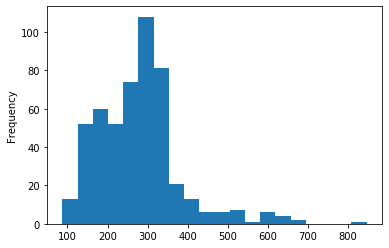

In [49]:
reviews.length.plot(bins=20, kind='hist') 

In [50]:
reviews.length.describe()

count    507.000000
mean     276.532544
std      104.546869
min       87.000000
25%      201.500000
50%      279.000000
75%      320.000000
max      847.000000
Name: length, dtype: float64

In [51]:
print(list(reviews.Tweet[reviews.length > 700].index)) #near the max for length of LemmatizedTweets
print(list(reviews.Type[reviews.length > 700]))

[151]
['Leukemia']


Wall time: 563 ms


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000299F2795240>,
      dtype=object)

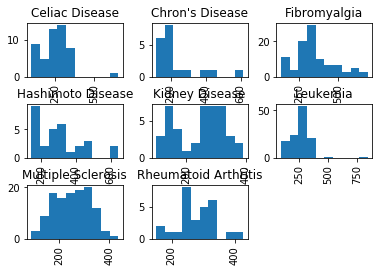

In [53]:
%%time
reviews.hist(column='length', by='Type', bins=10)

In [54]:
def split_into_tokens(review):
    
    #review = unicode(review, 'iso-8859-1')# in python 3 the default of str() previously python2 as unicode() is utf-8
    return TextBlob(review).words

In [55]:


reviews.Tweet.head().apply(split_into_tokens)



288    [Aleksandar, dr, Petrov, aleksandar_BG, ·, Dec...
70     [Beyond, UNKNOWN, BeyondUNKNOWN, ·, Sep, 17, 2...
184    [HandsOffVenezuela, ChicoFreedom, ·, Dec, 2, o...
459    [Adult, Pediatric, Ear, Nose, Throat, EarAdult...
448    [Angela, J, White, 50Plushealths, ·, Dec, 15, ...
Name: Tweet, dtype: object

In [56]:
TextBlob("hello world, how is it going?").tags

[('hello', 'JJ'),
 ('world', 'NN'),
 ('how', 'WRB'),
 ('is', 'VBZ'),
 ('it', 'PRP'),
 ('going', 'VBG')]

In [57]:


import nltk
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\m\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [58]:
from nltk.corpus import stopwords

stop = stopwords.words('english')
stop = stop + [u'a',u'b',u'c',u'd',u'e',u'f',u'g',u'h',u'i',u'j',u'k',u'l',u'm',u'n',u'o',u'p',u'q',u'r',u's',u't',u'v',u'w',u'x',u'y',u'z']

In [64]:
def split_into_lemmas(review):
    #review = unicode(review, 'iso-8859-1')
    review = review.lower()
    #review = unicode(review, 'utf8').lower()
    #review = str(review).lower()
    words = TextBlob(review).words
    # for each word, take its "base form" = lemma 
    return [word.lemma for word in words if word not in stop]

reviews.Tweet.head().apply(split_into_lemmas)

288    [aleksandar, dr, petrov, aleksandar_bg, ·, dec...
70     [beyond, unknown, beyondunknown, ·, sep, 17, 2...
184    [handsoffvenezuela, chicofreedom, ·, dec, 2, o...
459    [adult, pediatric, ear, nose, throat, earadult...
448    [angela, white, 50plushealths, ·, dec, 15, 201...
Name: Tweet, dtype: object

In [65]:


%%time
bow_transformer = CountVectorizer(analyzer=split_into_lemmas, ngram_range=(2,2)).fit(reviews['Type'])
print(len(bow_transformer.vocabulary_))



12
Wall time: 234 ms


In [66]:
bow_transformer

CountVectorizer(analyzer=<function split_into_lemmas at 0x00000299F2B30D90>,
                binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(2, 2), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [67]:
review4 = reviews['Tweet'][151]
print(review4)

BTS Mauritius
@BTSMauritius
·
19h
The Korea Leukemia Childrens Foundation announced that 553 ARMYs donated blood in honour of @BTS_twt
s Jin birthday!

Itll be used for children with cancer who need to receive large blood transfusions during treatment, helping to ease the burden of costs for patients families.
Quote Tweet
??????
??
??
@_nojam_nolife
 · Dec 3
????? ? ??, ?? ?? ??? ??(??)  
??
http://entertain.v.daum.net/v/20191204091525391

#????? #BTS @BTS_twt 

??????????? ?????? ????? ? ????? ?? ?? ??? 12? 4? ????? ?? ???? ?? ??? ???? ??? 553?? ????? ???.
Image
Image
Image
Image
Imprisoned Babies
@aptlmetin
·
Dec 3
Akif Acute Lymphoblastic Leukemia patient. He is going through a heavy treatment process. He needs medicare. Let mom?enay DA?TAN have her trial without arrest!
#InternationalDisabilityDay 


In [68]:


bow4 = bow_transformer.transform([review4])
print(bow4)



  (0, 8)	2


In [69]:
%%time
reviews_bow = bow_transformer.transform(reviews['Tweet'])
print('sparse matrix shape:', reviews_bow.shape)
print('number of non-zeros:', reviews_bow.nnz)
print('sparsity: %.2f%%' % (100.0 * reviews_bow.nnz / (reviews_bow.shape[0] * reviews_bow.shape[1])))

sparse matrix shape: (507, 12)
number of non-zeros: 412
sparsity: 6.77%
Wall time: 1.05 s


In [70]:


# Split/splice into training ~ 80% and testing ~ 20%
reviews_bow_train = reviews_bow[:400]
reviews_bow_test = reviews_bow[400:]
reviews_sentiment_train = reviews['Type'][:400]
reviews_sentiment_test = reviews['Type'][400:]

print(reviews_bow_train.shape)
print(reviews_bow_test.shape)



(400, 12)
(107, 12)


In [71]:


%time review_sentiment = MultinomialNB().fit(reviews_bow_train, reviews_sentiment_train)



Wall time: 0 ns


In [72]:


print('predicted:', review_sentiment.predict(bow4)[0])
print('expected:', reviews.Type[151])



predicted: Leukemia
expected: Leukemia


In [73]:


predictions = review_sentiment.predict(reviews_bow_test)
print(predictions)



['Multiple Sclerosis' 'Celiac Disease' 'Leukemia' 'Leukemia' 'Leukemia'
 'Multiple Sclerosis' 'Multiple Sclerosis' 'Multiple Sclerosis'
 'Multiple Sclerosis' 'Multiple Sclerosis' 'Multiple Sclerosis'
 'Fibromyalgia' 'Multiple Sclerosis' 'Multiple Sclerosis' 'Leukemia'
 'Celiac Disease' 'Multiple Sclerosis' 'Multiple Sclerosis'
 'Multiple Sclerosis' 'Multiple Sclerosis' 'Leukemia' 'Celiac Disease'
 'Multiple Sclerosis' 'Multiple Sclerosis' 'Multiple Sclerosis'
 'Multiple Sclerosis' 'Multiple Sclerosis' 'Multiple Sclerosis'
 'Hashimoto Disease' 'Multiple Sclerosis' 'Fibromyalgia'
 'Multiple Sclerosis' 'Celiac Disease' 'Multiple Sclerosis'
 'Multiple Sclerosis' 'Leukemia' 'Leukemia' 'Leukemia' 'Leukemia'
 'Multiple Sclerosis' 'Multiple Sclerosis' 'Multiple Sclerosis'
 'Multiple Sclerosis' 'Leukemia' 'Celiac Disease' 'Leukemia'
 'Multiple Sclerosis' 'Leukemia' 'Leukemia' 'Celiac Disease' 'Leukemia'
 'Multiple Sclerosis' 'Multiple Sclerosis' 'Multiple Sclerosis'
 'Multiple Sclerosis' 'Leuke

In [74]:
print('accuracy', accuracy_score(reviews_sentiment_test, predictions))
print('confusion matrix\n', confusion_matrix(reviews_sentiment_test, predictions))
print('(row=expected, col=predicted)')

accuracy 0.5327102803738317
confusion matrix
 [[ 2  0  0  0  1  0  3  0]
 [ 1  0  0  0  0  0  2  0]
 [ 0  0  4  1  0  0 18  0]
 [ 3  0  2  0  1  0  2  0]
 [ 6  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 29  0  0]
 [ 4  0  1  0  0  0 22  0]
 [ 1  0  0  0  0  0  4  0]]
(row=expected, col=predicted)


In [75]:
print(classification_report(reviews_sentiment_test, predictions))
#The F1 score can be interpreted as a weighted average of the precision and recall, 
#where an F1 score reaches its best value at 1 and worst score at 0.

                      precision    recall  f1-score   support

      Celiac Disease       0.12      0.33      0.17         6
     Chron's Disease       0.00      0.00      0.00         3
        Fibromyalgia       0.57      0.17      0.27        23
   Hashimoto Disease       0.00      0.00      0.00         8
      Kidney Disease       0.00      0.00      0.00         6
            Leukemia       1.00      1.00      1.00        29
  Multiple Sclerosis       0.43      0.81      0.56        27
Rheumatoid Arthritis       0.00      0.00      0.00         5

            accuracy                           0.53       107
           macro avg       0.27      0.29      0.25       107
        weighted avg       0.51      0.53      0.48       107



c:\users\m\anaconda2\envs\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [76]:
def predict_review(new_review): 
    new_sample = bow_transformer.transform([new_review])
    print(new_review, '\nThe respective order new or pro probabilities:\n',np.around(review_sentiment.predict_proba(new_sample), decimals=2),'\n')

In [77]:


reviews.Type.unique()



array(['Multiple Sclerosis', 'Celiac Disease', 'Leukemia',
       'Hashimoto Disease', 'Fibromyalgia', 'Kidney Disease',
       'Rheumatoid Arthritis', "Chron's Disease"], dtype=object)

# There are eight classes for:

1:Multiple Sclerosis, 2:Celiac, 3: Leukemia, 4: Hashimoto, 5: Fibromyalgia, 6: Kidney Disease, 7: Rheumatoid Arthritis, 8: Chron's Disease
The respective probabilities correspond to those diseases
Below random sentiments were ran to see how well the NLP predictions rank the four figurative tweets.

In [78]:
predict_review('driving to the hospital.')

predict_review('When is lunch?')

predict_review('Theme parks are great.')
predict_review('Working is great if it pays the bills.')
#a snippet of an actual tweet from RA
predict_review('Treatment broadspectrum betalactam antibiotics including sulfonamide trimethoprim associated diagnosis.')

driving to the hospital. 
The respective order new or pro probabilities:
 [[0.11 0.04 0.19 0.06 0.09 0.22 0.23 0.06]] 

When is lunch? 
The respective order new or pro probabilities:
 [[0.11 0.04 0.19 0.06 0.09 0.22 0.23 0.06]] 

Theme parks are great. 
The respective order new or pro probabilities:
 [[0.11 0.04 0.19 0.06 0.09 0.22 0.23 0.06]] 

Working is great if it pays the bills. 
The respective order new or pro probabilities:
 [[0.11 0.04 0.19 0.06 0.09 0.22 0.23 0.06]] 

Treatment broadspectrum betalactam antibiotics including sulfonamide trimethoprim associated diagnosis. 
The respective order new or pro probabilities:
 [[0.11 0.04 0.19 0.06 0.09 0.22 0.23 0.06]] 



## In above figurative tweets, the eight classes of autoimmune diseases for this research gave:
all as the same probability figures. Not what was expected.